<font size=4 color='blue'>

# <center> Clase 5, octubre 21 del 2020 </center>

<font size=4 color='blue'>

# <center> Tópico de estudio: Mortalidad por diabetes </center>

<font size=4 color='blue'>
    
## Información sobre el tópico

<font size=4>

Evolución de la diabetes despues de un año.
    
En el presente trabajo, la diabetes la caracterizamos con los siguientes diez rasgos: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo (S1, S2, S3, S4, S5, S6).


<font size=4 color='blue'>
    
## Cuantificación de esta información

<font size=4>

Se tienen información de 442 pacientes (m = 442). La respuesta de interés, Y, es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de Y varían entre 25 y 346

Fuente de la información: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    

Artículo original: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Los datos se encuentran el el archivo diabetes.csv

df = pd.read_csv('diabetes.csv', sep ='\t')

# se crea el dataframe df, el cual contiene los 10 rasgos relevantes de los pacientes
# diabeticos, así como el progreso (y) de la enfermedad un año después de comenzado el estudio. 

In [3]:
# Se despliegan las primeras 5 muestras (rasgos, objetivo)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
# el método describe() genera una tabla con informacion estadistica de cada uno de los rasgos y del objetivo.

df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

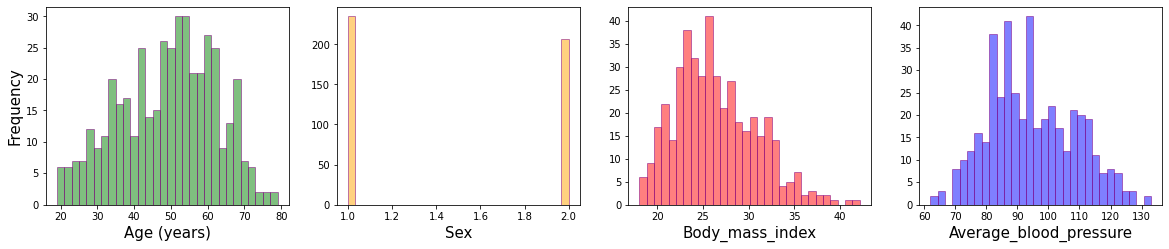

In [5]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Average_blood_pressure', size=15);

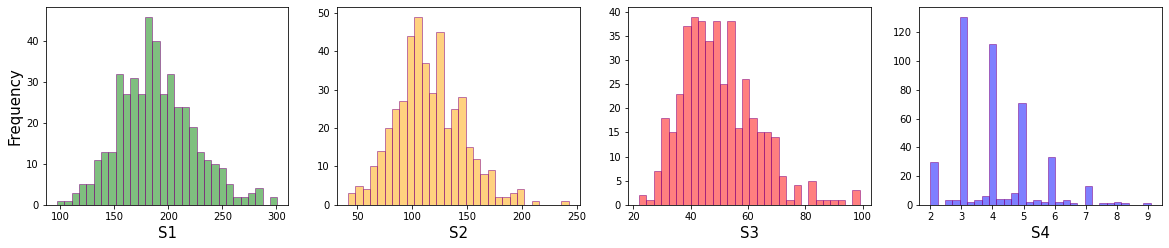

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S1', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S2', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('S3', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('S4', size=15);

Text(0.5, 0, 'Y')

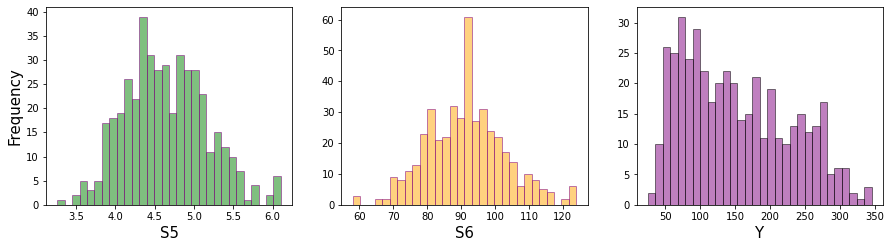

In [7]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S5', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S6', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>

Para quitar cualquier posible correlación entre las muestras (los renglones del DataFrame), estos se reordenan al azar.

In [8]:
df = df.sample(frac=1)

<font size=4>
    
Se dividen la muestras originales en 2 conjuntos: 90 % para el entrenamiento y 10 % para hacer inferencias predicciones) con lo aprendido.

In [9]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [10]:
print(df_train.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=4>

Para trabajar con los modelos se requiere que todas las variables tengan el mismo orden de magnitud. Por ello, se normalizan sus valores en las muestras que se van a emplear en el entrenamiento, tanto los rasgos (X) y las objetivo o referencia (Y):

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [11]:
df_train_norm = (df_train - df_train.mean()) / df_train.std()

In [12]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()

<font size=4>
    
Histogramas de las variables que se emplearán en el entrenamiento:

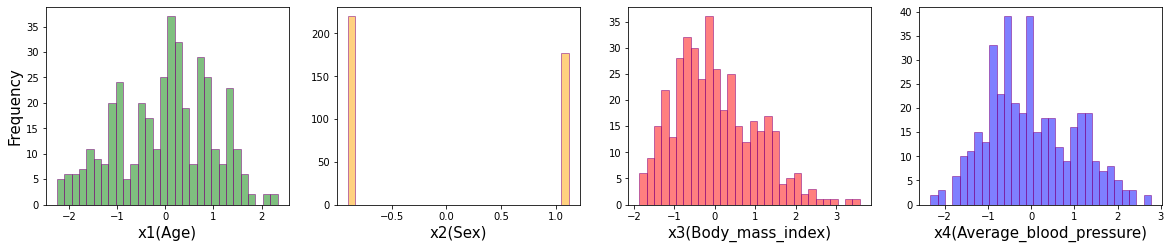

In [13]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Average_blood_pressure)', size=15);

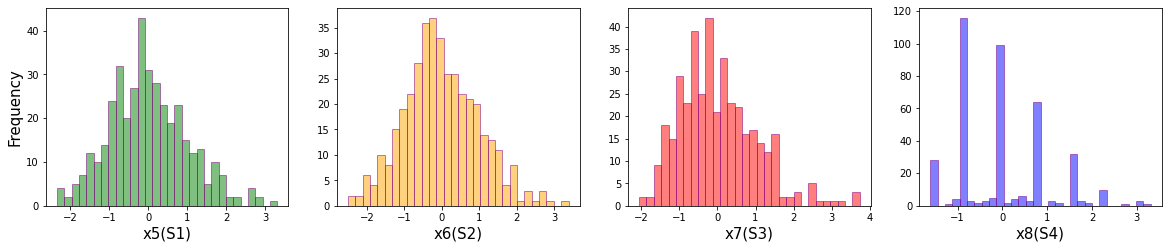

In [14]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(S1)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(S2)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(S3)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(S4)', size=15);

Text(0.5, 0, 'Y')

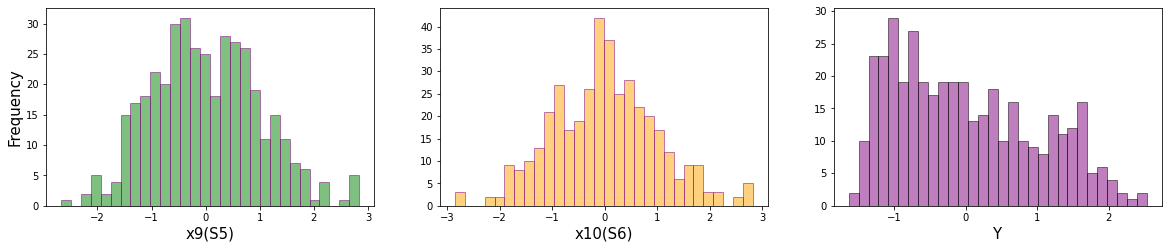

In [15]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(S5)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(S6)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>
Los valores de las variables X e Y se extraen de las columnas del DataFrame.

In [16]:
train_x = df_train_norm.values[:,:-1]
train_y = df_train_norm.values[:,-1:]

In [17]:
test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [18]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(397, 10)
(397, 1)
(45, 10)
(45, 1)


<font size=5 color='blue'>

# <center> Artificial Neural Networks </center>




<font size=4 color='blue'>

# <center> Implemented using the framework PyTorch </center>

<font size=4 color='blue'>
    
[Pytorch](https://pytorch.org/)

<font size=5 color='blue'>

Generating a full-connected feedforward (FFF) artificial neural network.

In [19]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)
                

It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


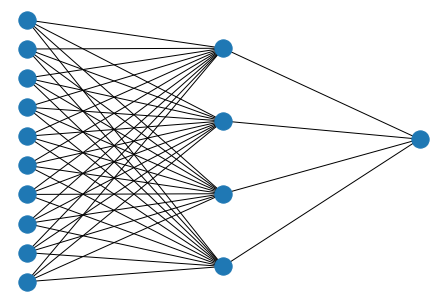

In [20]:
n_x = train_x.shape[1] 
n_h = 4
n_y = train_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

___

<font size=5 color='blue'>

Installing Pytorch

In [21]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F #modulo de funciones sin que los parametros sean actualizables

#seed=torch.seed()
#torch.manual_seed(seed)
#np.random.seed(1)
print('El seed es', torch.seed())

El seed es 14738836626034743588


In [22]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(397, 10)
(397, 1)
(45, 10)
(45, 1)


In [23]:
val_ratio = 0.1
train_ratio = int((1.0-val_ratio)*train_x.shape[0])
X_val = train_x[train_ratio:,:]
Y_val = train_y[train_ratio:,:]

X_train = train_x[:train_ratio,:]
Y_train = train_y[:train_ratio,:]

In [24]:
train_x= torch.Tensor(X_train)
train_y = torch.Tensor(Y_train)
val_x = torch.Tensor(X_val)
val_y = torch.Tensor(Y_val)
test_x = torch.Tensor(test_x)
test_y = torch.tensor(test_y)

In [25]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([357, 10])
torch.Size([357, 1])
torch.Size([40, 10])
torch.Size([40, 1])
torch.Size([45, 10])
torch.Size([45, 1])


<font size=4>


PyTorch has a module nn.Module that has defined functions to construct the neural network. Therefore, this module is used to conctruct the architecture of the network. 

A module can contain other modules. They can be added to contruct Tree Structures.

Documentation: [nn.Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)

<font size=5 color='blue'>

The following class is used to construct the network architecture
    
and to compile the constructed model of the network.

In [26]:
class Neural_Network(nn.Module):
    
    def __init__(self, ):
        
        super(Neural_Network, self).__init__()
        
        # numero de nodos de la capa de entrada, i.e., numero de rasgos:
        
        self.inputSize = 10
        
        # numero de nodos en la capa de salida:
        
        self.outputSize = 1
        
        # numero de nodos en la capa intermedia
        
        self.hiddenSize = 4
        
        # inicializacion de los pesos ...
        
        # entre las capas de entrada e intermedia:
        
        self.W1 = torch.randn(self.inputSize, self.hiddenSize)
        
        # entre la capa intermedia y de salida:
        
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) 
        
        
    # ______________________________________________________________________________________
        
    def forward(self, X):
        
        # combinacion lineal entre los rasgos (X) y los pesos entre las capas de entrada e intermedia:
        
        self.z = torch.matmul(X, self.W1)
        
        # Aplicacion a z de la funcion sigmoide: sigmoid(z)=z2
        
        self.z2 = self.sigmoid(self.z) 
        
        # combinacion lineal entre z2 y los pesos de las capas intermedia y de salida:
        
        self.z3 = torch.matmul(self.z2, self.W2)
        
        # Aplicacion de la funcion lineal, lineal(z3) = z3 = o
        
        o = self.z3 
        
        return o
    
    # ________________________________________________________________________________
        
    # definicion de la funcion sigmiode y su derivada:
    
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        
        return s * (1 - s)
    
    #__________________________________________________________________________________
    
    
    def backward(self, X, y, o, alpha):
        
        # calculo de derivadas:
        
        self.o_error = y - o 
        
        self.o_delta = self.o_error
        
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        
        # actualizacion de parametros usando las derivadas anteriores:
        
        self.W1 += alpha*torch.matmul(torch.t(X), self.z2_delta)
        
        self.W2 += alpha*torch.matmul(torch.t(self.z2), self.o_delta)
        
    # ___________________________________________________________________________________
        
    def train(self, X, y):
        
        # se realizan los pasos en forward y backward:
        
        o = self.forward(X)
        
        self.backward(X, y, o, 0.001)
        
    # ____________________________________________________________________________________
        
        
    def saveWeights(self, model):
        
        # funcion de almacenamiento interno de PyTorch:
        
        torch.save(model, "NN")
        
        # Para recargar el modelo con todos los pesos:
        
        torch.load("NN")
        
    # _______________________________________________________________________________________
        
    # la siguiente funcion hace las predicciones sobre el conjunto de prueba:    
    
    def predict(self, xPredicted):
        
        print ("Predicted data based on trained weights: ")
        
        print ("Input (scaled): \n" + str(xPredicted))
        
        print ("Output: \n" + str(self.forward(xPredicted)))
        
        return self.forward(xPredicted)
        
        
    def accuracy(self, dataset_x, dataset_y):
        
        r = 0
        
        m = len(dataset_y)
        
        for i in range(len(dataset_y)):
                    
            r += (i-self.forward(dataset_x[i]))**2
        
        r /= m 
        
        acc = 100 - r*100
        
        return acc

<font size=5 color='blue'>

Training the learning system

In [27]:
epochs = 100

# listas para guardar los costos durante el entrenamiento:

loss_train = []
loss_val = []

NN = Neural_Network()
print_cost=True

for i in range(epochs): 
    
    print ("# " + str(i) + " Loss train: " + str(round(torch.mean((train_y - NN(train_x))**2).detach().item(), 5)),
           '\t'"Loss val: " + str(round(torch.mean((val_y - NN(val_x))**2).detach().item(), 5)))

   
    loss_train.append(torch.mean((train_y - NN(train_x))**2).detach().item())
    
    loss_val.append(torch.mean((val_y - NN(val_x))**2).detach().item())
    
    NN.train(train_x, train_y)
    
NN.saveWeights(NN)


# 0 Loss train: 0.79188 	Loss val: 0.98066
# 1 Loss train: 0.74671 	Loss val: 0.92766
# 2 Loss train: 0.71056 	Loss val: 0.88523
# 3 Loss train: 0.68115 	Loss val: 0.85059
# 4 Loss train: 0.65694 	Loss val: 0.82186
# 5 Loss train: 0.63683 	Loss val: 0.79773
# 6 Loss train: 0.62002 	Loss val: 0.77726
# 7 Loss train: 0.60589 	Loss val: 0.75975
# 8 Loss train: 0.59395 	Loss val: 0.74466
# 9 Loss train: 0.58382 	Loss val: 0.73156
# 10 Loss train: 0.57516 	Loss val: 0.72013
# 11 Loss train: 0.56772 	Loss val: 0.71007
# 12 Loss train: 0.56128 	Loss val: 0.70118
# 13 Loss train: 0.55566 	Loss val: 0.69327
# 14 Loss train: 0.55071 	Loss val: 0.68618
# 15 Loss train: 0.54633 	Loss val: 0.6798
# 16 Loss train: 0.54243 	Loss val: 0.67403
# 17 Loss train: 0.53891 	Loss val: 0.66878
# 18 Loss train: 0.53574 	Loss val: 0.66397
# 19 Loss train: 0.53285 	Loss val: 0.65956
# 20 Loss train: 0.53021 	Loss val: 0.6555
# 21 Loss train: 0.52779 	Loss val: 0.65173
# 22 Loss train: 0.52555 	Loss val: 0.64823


<font size=5 color='blue'>

Plots of the costs functions versus the epoch    

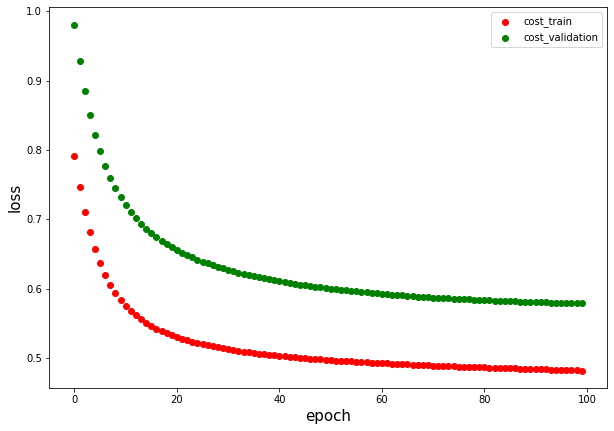

In [28]:
plt.figure(figsize=(10, 7))

plt.scatter(range(epochs), loss_train, color='red')
plt.scatter(range(epochs), loss_val, color='green')
plt.xlabel('epoch', size=15)
plt.ylabel('loss', size=15)
plt.legend(['cost_train', 'cost_validation'])

<font size=5 color='blue'>
    
Inference

In [29]:
sample = 4

NN.predict(test_x[sample])

print('\n')

print('Target: ', test_y[sample])

Predicted data based on trained weights: 
Input (scaled): 
tensor([ 0.4994,  1.1135, -0.6536, -0.8213, -0.6860, -0.4663, -0.3059, -0.0420,
        -0.2303,  0.4148])
Output: 
tensor([-0.5700])


Target:  tensor([-1.2772], dtype=torch.float64)
